# Steps for Hypothesis Testing:
  
- Hypothesize about a population by stating H0 and H1. 
- Build the model 
- Check the p_value
- Compare the p_value with alpha; if p_value is less than alpha, Rej Ho
- Result of the test

# ChiSquare Test

## Feature Selection

**Check if there exists relation between one categorical and one categorical data**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

The manager of a restaurant wants to find the relation between customer satisfaction and the salaries of the people waiting tables.

- She takes a random sample of 100 customers asking if the service was excellent, good, or poor.
- She then categorizes the salaries of the people waiting as low, medium, and high.

Her findings are shown in the table below:


In [2]:
data = pd.read_csv('ChiSquare.csv')
data

,Service,Low,Medium,High,Row_Totals
0,Excellent,9,10,7,26
1,Good,11,9,31,51
2,Poor,12,8,3,23
3,Column_Totals,32,27,41,100


**Ho: Salaries and the Service are independent**

**Ha: Salaries and the Service are not independent**

In [3]:
del data['Service']

data.columns = ['low', "medium", "high", "Row_Totals"]

data.index = ['excellent', 'good', 'poor', 'Column_Totals']

display (data)

,low,medium,high,Row_Totals
excellent,9,10,7,26
good,11,9,31,51
poor,12,8,3,23
Column_Totals,32,27,41,100


In [4]:
data.drop("Row_Totals", axis = 1, inplace = True)
data.drop(data.index[3], axis = 0, inplace = True)

display (data)

,low,medium,high
excellent,9,10,7
good,11,9,31
poor,12,8,3


In [5]:
chi_square, pvalue, degrees_of_freedom, expected_frequencies = stats.chi2_contingency(data)

print(chi_square)  # Test Statistic
print ()
print(pvalue) 
print ()
print(degrees_of_freedom)
print ()
print(expected_frequencies)

18.658230409973125

0.0009172334128317392

4

[[ 8.32  7.02 10.66]
 [16.32 13.77 20.91]
 [ 7.36  6.21  9.43]]


In [6]:
alpha = 0.05

if pvalue <= alpha:
    print ("Rej Ho")
else:
    print ('We do not rej Ho')

Rej Ho


**Result :: Reject Ho, Service quality is dependent on the salaries of the people**

In [7]:
data = pd.read_csv('trainl.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128,360,1,0,0,1,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,1,0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,0,0,1,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,0,0,1,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,0,0,1,Y


# Is the gender of the customer and the Loan Status related? 

In [8]:
data.Gender
data.Loan_Status

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [9]:
tbl = pd.crosstab(data.Gender, data.Loan_Status)
display (tbl)

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


In [10]:
chi_square, pvalue, degrees_of_freedom, expected_frequencies = stats.chi2_contingency(tbl)

print(chi_square)  # Test Statistic
print ()
print(pvalue) 
print ()
print(degrees_of_freedom)
print ()
print(expected_frequencies)

0.11087854691241235

0.7391461310869638

1

[[ 35.0228013  76.9771987]
 [156.9771987 345.0228013]]


In [11]:
if pvalue <= alpha:
    print ("Rej Ho.")
else:
    print ("We do not rej Ho.")

We do not rej Ho.


**Result :: We do not rej Ho. There is no relationship between gender of the customer and the Loan Status**

# Is there relation between education level of the customer and Loan_Status?

In [12]:
tbl = pd.crosstab(data.Education, data.Loan_Status)
display (tbl)
print ()

chi_square, pvalue, degrees_of_freedom, expected_frequencies=stats.chi2_contingency(tbl)

print(pvalue)
print ()

if pvalue <= alpha:
    print ("Rej Ho.")
else:
    print ("We do not rej Ho.")

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82



0.04309962129357355

Rej Ho.


**Result :: Rej Ho. Education and Loan Status are not independent. There is relationship between education level and Loan Status.**

## Is there a relationship between Credit_History and Loan_Status?

In [13]:
# Ho :: There is no relationship between Credit_History of the customer and the Loan Status
# H1 :: There is relationship between Credit_History of the customer and the Loan Status

In [14]:
tbl = pd.crosstab(data.Credit_History, data.Loan_Status)
display (tbl)
print ()

chi_square, pvalue, degrees_of_freedom, expected_frequencies=stats.chi2_contingency(tbl)

print(pvalue)
print ()

if pvalue <= alpha:
    print ("Rej Ho.")
else:
    print ("We do not rej Ho.")

Loan_Status,N,Y
Credit_History,,
0,82,7
1,110,415



3.4183499979091188e-40

Rej Ho.


***Result :: Rej Ho. Credit_History and Loan Status are not independent. There is relationship between Credit_History and Loan Status.***

## Is there a relationship between Self_Employed and Loan_Status?

In [15]:
# Ho :: There is no relationship between Self_Employed status of the customer and the Loan Status
# H1 :: There is relationship between Self_Employed status of the customer and the Loan Status

In [32]:
tbl = pd.crosstab(data.Self_Employed, data.Loan_Status)
display (tbl)
print ()

chi_square, pvalue, degrees_of_freedom, expected_frequencies=stats.chi2_contingency(tbl)

print(pvalue)
print ()

if pvalue <= alpha:
    print ("Rej Ho.")
else:
    print ("We do not rej Ho.")

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56



1.0

We do not rej Ho.


# ANOVA - Analysis of Variance

## Feature Selection

**Check if there exists relation between one continuous and one categorical data**

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
data_Sorority = pd.read_csv('Sorority - Copy.csv')
display(data_Sorority)

,Score,Sorority
0,2.17,Sorority 1
1,1.85,Sorority 1
2,2.83,Sorority 1
3,1.69,Sorority 1
4,3.33,Sorority 1
5,2.63,Sorority 2
6,1.77,Sorority 2
7,3.25,Sorority 2
8,1.86,Sorority 2
9,2.21,Sorority 2


In [18]:
# Ho :: Schools and Scores are independent
# H1 :: Schools and Scores are dependent

In [19]:
mod = ols('Score ~ Sorority', data = data_Sorority).fit() # continuous ~ categorical
aov = sm.stats.anova_lm(mod)
print (aov)
print()
pvalue = mod.f_pvalue
print (pvalue)
print()
alpha = 0.05

if pvalue <= alpha:
    print ("Rej Ho.")
else:
    print ("We do not rej Ho.")

            df   sum_sq   mean_sq         F    PR(>F)
Sorority   3.0  2.88732  0.962440  2.230323  0.124144
Residual  16.0  6.90440  0.431525       NaN       NaN

0.12414355200708288

We do not rej Ho.


In [20]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128,360,1,0,0,1,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,1,0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,0,0,1,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,0,0,1,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,0,0,1,Y


## Is there a relationship between Loan Status and Applicant Income?

In [21]:
# Ho :: Loan Status and Applicant Income are independent
# H1 :: Loan Status and Applicant Income are not independent 

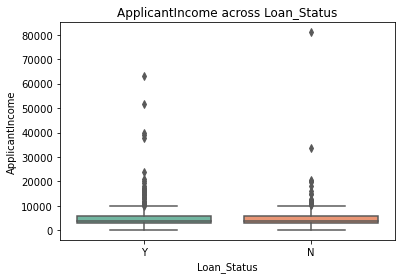

In [22]:
sns.boxplot(y = data.ApplicantIncome, x = data.Loan_Status, palette ='Set2').set(title = "ApplicantIncome across Loan_Status");

In [23]:
mod = ols('ApplicantIncome ~ Loan_Status', data = data).fit() # continuous ~ categorical
aov = sm.stats.anova_lm(mod)
print (aov)
print()
pvalue = mod.f_pvalue
print (pvalue)
print()
alpha = 0.05

if pvalue <= alpha:
    print ("Rej Ho.")
else:
    print ("We do not rej Ho.")

                df        sum_sq       mean_sq         F    PR(>F)
Loan_Status    1.0  5.074116e+05  5.074116e+05  0.013574  0.907288
Residual     612.0  2.287689e+10  3.738054e+07       NaN       NaN

0.90728781213084

We do not rej Ho.


**Result :: Do Not Reject Ho. Loan Status and Applicant Income are independent**

## Is there a relationship between Education and Applicant Income?

In [24]:
# Ho :: Education and Applicant Income are independent
# H1 :: Education and Applicant Income are not independent 

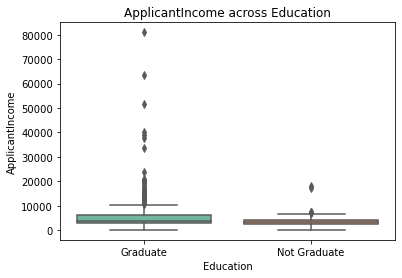

In [25]:
sns.boxplot(y = data.ApplicantIncome, x = data.Education, palette ='Set2').set(title = "ApplicantIncome across Education");

In [26]:
mod = ols('ApplicantIncome ~ Education', data = data).fit() # continuous ~ categorical
aov = sm.stats.anova_lm(mod)

pvalue = mod.f_pvalue
print (pvalue)
print()

alpha = 0.05

if pvalue <= alpha:
    print ("Rej Ho.")
else:
    print ("We do not rej Ho.")

0.0004683635451122781

Rej Ho.


**Result :: We rej Ho. Education and Applicant Income are not independent**

## Is there a relationship between Gender and ApplicantIncome?

In [27]:
# Ho :: Gender and ApplicantIncome are independent
# H1 :: Gender and ApplicantIncome are not independent 

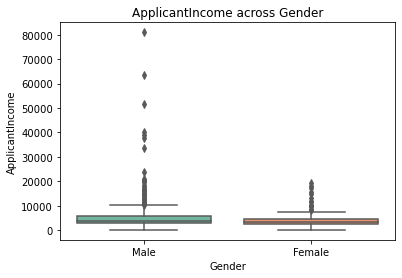

In [28]:
sns.boxplot(y = data.ApplicantIncome, x = data.Gender, 
            palette ='Set2').set(title = "ApplicantIncome across Gender");


In [29]:
mod = ols('ApplicantIncome ~ Gender', data = data).fit() # continuous ~ categorical
aov = sm.stats.anova_lm(mod)

pvalue = mod.f_pvalue
print (pvalue)
print()

alpha = 0.05

if pvalue <= alpha:
    print ("Rej Ho.")
else:
    print ("We do not rej Ho.")

0.14552548194537038

We do not rej Ho.


**Result :: We do not rej Ho. Gender and ApplicantIncome are independent.**

## Is there a relationship between Gender and CoapplicantIncome?

In [30]:
# Ho :: Gender and CoapplicantIncome are independent
# H1 :: Gender and CoapplicantIncome are not independent 

In [34]:
mod = ols('CoapplicantIncome ~ Gender', data = data).fit() # continuous ~ categorical
aov = sm.stats.anova_lm(mod)

pvalue = mod.f_pvalue
print (pvalue)
print()

alpha = 0.05

if pvalue <= alpha:
    print ("Rej Ho.")
else:
    print ("We do not rej Ho.")

0.039992055646408675

Rej Ho.
